In [ ]:
#Example Usage

from kmer_feature_matrix_pipeline_funcs import *

df_slim = pd.read_csv('/Users/joesouber/Downloads/filtered_df.csv')
df_slim = pd.DataFrame(df_slim)

X, y, feature_names, kmer_count_dict, epitope_names = create_features_matrix(df_slim, include_alpha=False, include_beta=True, alpha_col='cdr3_a_aa', beta_col='cdr3.beta', label_col='antigen.epitope', k=3)
#classifier = GradientBoostingClassifier(subsample=0.8,random_state=10, n_estimators=70, learning_rate=0.1, max_features='sqrt', max_depth=10)
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
auc_result, acc, precision, recall = predict_auc(X, y, rf_classifier, 5, epitope_names, True)

In [2]:
from kmer_feature_matrix_pipeline_funcs import *


df = pd.read_csv('/Users/joesouber/OneDrive - University of Bristol/MSc Data Science/data science mini project/dsmp-2024-group-13/vdjdb_full.txt', sep='\t')
df = pd.DataFrame(df)

/var/folders/vx/p6h8zj0n0wxd9qrn2pk09l9c0000gn/T/ipykernel_50891/3845730327.py:4: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/joesouber/OneDrive - University of Bristol/MSc Data Science/data science mini project/dsmp-2024-group-13/vdjdb_full.txt', sep='\t')


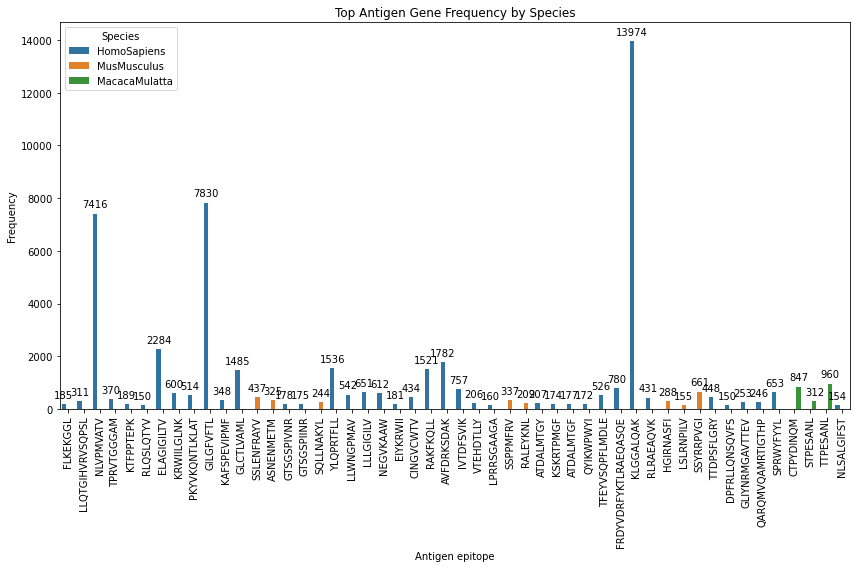

In [82]:
top_n = 50  # Show top 20 categories
top_antigen_genes = df['antigen.epitope'].value_counts().head(top_n).index
df_top_antigens = df[df['antigen.epitope'].isin(top_antigen_genes)]

plt.figure(figsize=(12, 8))  # Increase plot size
ax = sns.countplot(x='antigen.epitope', hue='species', data=df_top_antigens)
plt.title('Top Antigen Gene Frequency by Species')
plt.xlabel('Antigen epitope')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate labels
plt.legend(title='Species')
plt.tight_layout()  # Adjust layout


# Adding the annotation to each bar
for p in ax.patches:
    height = p.get_height()
    if pd.notnull(height):  # Check if the height is not NaN
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

In [3]:

df_preprocessed = preprocess_data(df)
df_preprocessed_species = filter_by_species(df_preprocessed)
df_preprocessed_species_min_score = filter_by_minimum_score(df_preprocessed_species)
#df_preprocessed_species



In [88]:
import pandas as pd



# Filter the DataFrame for the specific epitope
filtered_data = df_preprocessed[df_preprocessed['antigen.epitope'] == 'KLGGALQAK']

# Group by the 'vdjdb.score' column and count the occurrences
score_distribution = filtered_data['vdjdb.score'].value_counts().sort_index()

# Display the results
print(score_distribution)


0    13959
1        1
Name: vdjdb.score, dtype: int64


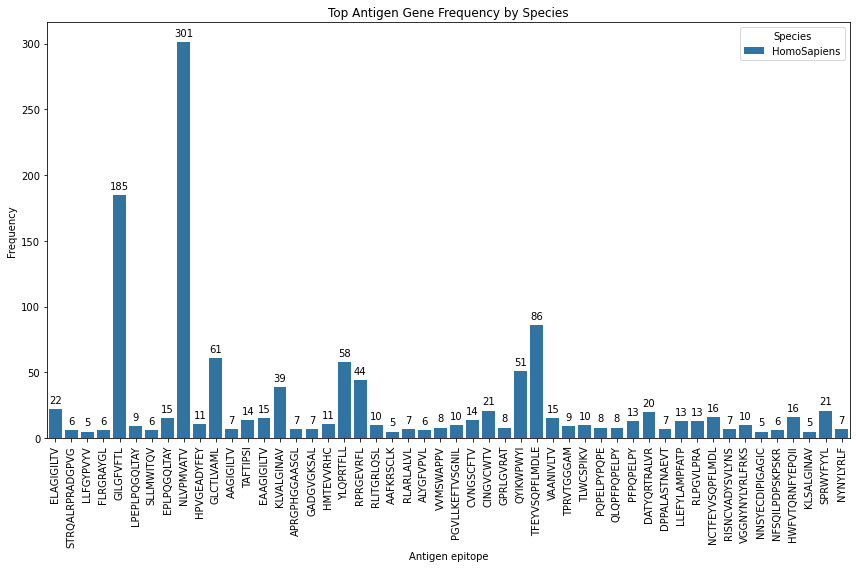

In [87]:
top_n = 50  # Show top 20 categories
top_antigen_genes = df_preprocessed_species_min_score['antigen.epitope'].value_counts().head(top_n).index
df_top_antigens = df_preprocessed_species_min_score[df_preprocessed_species_min_score['antigen.epitope'].isin(top_antigen_genes)]

plt.figure(figsize=(12, 8))  # Increase plot size
ax = sns.countplot(x='antigen.epitope', hue='species', data=df_top_antigens)
plt.title('Top Antigen Gene Frequency by Species')
plt.xlabel('Antigen epitope')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate labels
plt.legend(title='Species')
plt.tight_layout()  # Adjust layout


# Adding the annotation to each bar
for p in ax.patches:
    height = p.get_height()
    if pd.notnull(height):  # Check if the height is not NaN
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

In [4]:
#df_filtered_alpha = filter_by_length_range(df_preprocessed_species_min_score, 'cdr3.alpha')
#df_filtered_beta = filter_by_length_range(df_filtered_alpha, 'cdr3.beta')
df_filtered_epitope = filter_by_length_range(df_preprocessed_species_min_score, 'antigen.epitope')

/Users/joesouber/OneDrive - University of Bristol/MSc Data Science/data science mini project/dsmp-2024-group-13/filtering_functions.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + '.length'] = df[column_name].apply(len)


In [5]:

df_done = filter_by_mhc_class(df_preprocessed_species_min_score)
#df_done = filter_by_length_range(df_done, 'antigen.epitope')


In [6]:
df_done.reset_index(drop=True, inplace=True)
epitope_counts= df_done['antigen.epitope'].value_counts()
single_appearance = epitope_counts[epitope_counts == 1]
proportion_single = len(single_appearance) / len(epitope_counts)
print("Frequency of each epitope:")
print(epitope_counts)
print("\nEpitopes that appear only once:")
print(single_appearance)
print("\nProportion of epitopes that appear only once:")
print(proportion_single)



Frequency of each epitope:
NLVPMVATV     301
GILGFVFTL     185
GLCTLVAML      61
YLQPRTFLL      58
QYIKWPWYI      51
             ... 
RYPLTLGWCF      1
RFPLTFGWCF      1
ALWGPDPAAA      1
KSKRTPMGF       1
LLFGPVYV        1
Name: antigen.epitope, Length: 264, dtype: int64

Epitopes that appear only once:
WLDNFELCL     1
FTSDYYQLY     1
TMDFYQGQL     1
RMEQVDWTV     1
KLEFMDWRL     1
             ..
RYPLTLGWCF    1
RFPLTFGWCF    1
ALWGPDPAAA    1
KSKRTPMGF     1
LLFGPVYV      1
Name: antigen.epitope, Length: 167, dtype: int64

Proportion of epitopes that appear only once:
0.6325757575757576


In [7]:
epitopes_more_than_once = epitope_counts[epitope_counts > 1].index
df_filtered = df_done[df_done['antigen.epitope'].isin(epitopes_more_than_once)]


In [8]:
df_filtered['antigen.epitope'].value_counts()
df_filtered.reset_index(drop=True, inplace=True)
#df_filtered.to_csv('filtered_df.csv', index=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define your model
gbc = GradientBoostingClassifier(random_state=42)

# Define your parameter grid
param_grid = {
    'n_estimators': [10,30,70,100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5,7,10],
    'subsample': [0.8, 1.0],
}

# Set up the grid search
# Use 'roc_auc_ovr' for One-vs-Rest strategy or 'roc_auc_ovo' for One-vs-One
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='roc_auc_ovr', n_jobs=-1, verbose=2)

# Assuming X and y are your feature matrix and target vector
grid_search.fit(X, y)

# Review the results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation ROC AUC score:", grid_search.best_score_)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.8; total time=   5.9s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.8; total time=   6.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.8; total time=   6.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.8; total time=   6.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.8; total time=   6.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1.0; total time=   8.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1.0; total time=   8.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1.0; total time=   8.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1.0; total time=   7.9s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1.0; total time=   8.7s
[CV] END

In [57]:
dataset1 = df_preprocessed_species
dataset1 = dataset1.reset_index(drop=True)
columns = ['mhc.a','mhc.b','d.beta','vdjdb.score','mhc.class']
dataset1.drop(columns, inplace=True, axis=1)
#dataset1.to_csv('broken.csv', index=False)

In [34]:
#df_slim.to_csv('works.csv', index=False)

In [9]:
def filter_by_epitope_instances(df, label_col='antigen.epitope', min_instances=1):
    """
    Filter the DataFrame based on the number of instances for each unique epitope.

    Parameters:
    - df: pandas DataFrame containing your data.
    - label_col: The name of the column containing the epitope labels.
    - min_instances: The minimum number of instances required for an epitope to be retained.

    Returns:
    - A filtered pandas DataFrame where each epitope has at least `min_instances` instances.
    """
    # Count the number of instances for each unique epitope
    counts = df[label_col].value_counts()
    
    # Filter for epitopes that meet or exceed the minimum instance requirement
    valid_epitopes = counts[counts >= min_instances].index
    
    # Filter the DataFrame to only include rows with the valid epitopes
    filtered_df = df[df[label_col].isin(valid_epitopes)]
    
    return filtered_df
# Assuming 'df' is your original DataFrame
min_instances = 5 # Set the minimum number of instances required for inclusion
filtered_df = filter_by_epitope_instances(df_filtered, label_col='antigen.epitope', min_instances=min_instances)

print(f"Original DataFrame had {len(df_filtered)} rows.")
print(f"Filtered DataFrame has {len(filtered_df)} rows.")
print(f"unique epitopes in the filtered DataFrame: {filtered_df['antigen.epitope'].value_counts()}")
print(f"Number of unique epitopes in the filtered DataFrame: {filtered_df['antigen.epitope'].nunique()}")

Original DataFrame had 1218 rows.
Filtered DataFrame has 1058 rows.
unique epitopes in the filtered DataFrame: NLVPMVATV        301
GILGFVFTL        185
GLCTLVAML         61
YLQPRTFLL         58
QYIKWPWYI         51
RPRGEVRFL         44
KLVALGINAV        39
ELAGIGILTV        22
SPRWYFYYL         21
CINGVCWTV         21
DATYQRTRALVR      20
VAANIVLTV         15
EAAGIGILTV        15
EPLPQGQLTAY       15
CVNGSCFTV         14
TAFTIPSI          14
RLPGVLPRA         13
HPVGEADYFEY       11
HMTEVVRHC         11
RLITGRLQSL        10
TLWCSPIKV         10
TPRVTGGGAM         9
LPEPLPQGQLTAY      9
GPRLGVRAT          8
VVMSWAPPV          8
NYNYLYRLF          7
RLARLALVL          7
GADGVGKSAL         7
APRGPHGGAASGL      7
AAGIGILTV          7
FLRGRAYGL          6
SLLMWITQV          6
ALYGFVPVL          6
KLVAMGINAV         5
AAFKRSCLK          5
LLFGYPVYV          5
KLSALGINAV         5
Name: antigen.epitope, dtype: int64
Number of unique epitopes in the filtered DataFrame: 37


In [127]:
filtered_df.to_csv('filtered_dfnew.csv', index=False)

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define your model
gbc = GradientBoostingClassifier(random_state=42)

# Define your parameter grid
param_grid = {
    'n_estimators': [10,30,70,100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5,7,10],
    'subsample': [0.8, 1.0],
}

# Set up the grid search
# Use 'roc_auc_ovr' for One-vs-Rest strategy or 'roc_auc_ovo' for One-vs-One
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='roc_auc_ovr', n_jobs=-1, verbose=2)

# Assuming X and y are your feature matrix and target vector
grid_search.fit(X, y)

# Review the results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation ROC AUC score:", grid_search.best_score_)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.8; total time=   5.9s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.8; total time=   6.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.8; total time=   6.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.8; total time=   6.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.8; total time=   6.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1.0; total time=   8.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1.0; total time=   8.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1.0; total time=   8.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1.0; total time=   7.9s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1.0; total time=   8.7s
[CV] END

/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/met

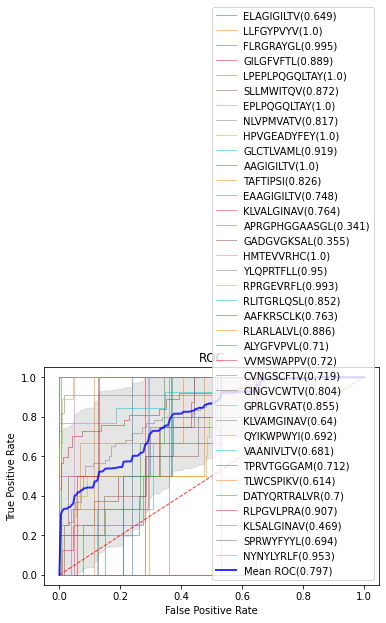

/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/met

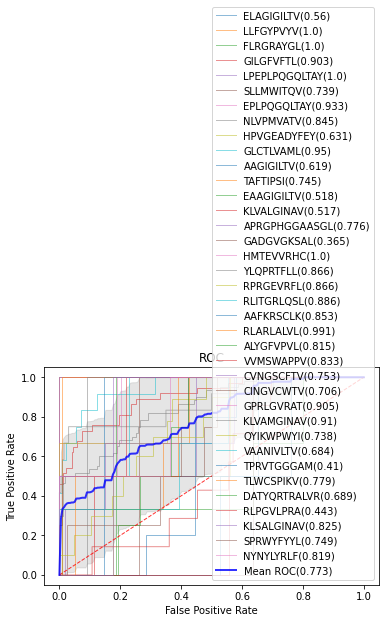

/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/met

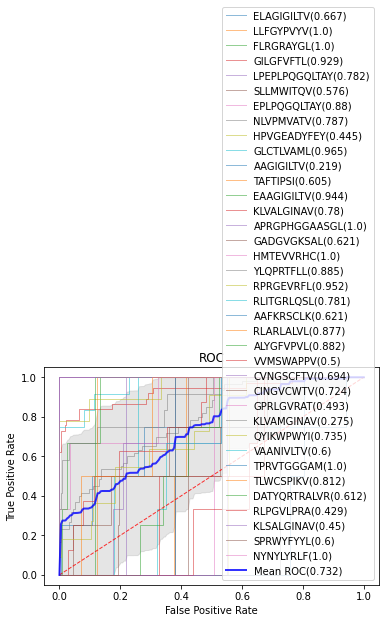

/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/met

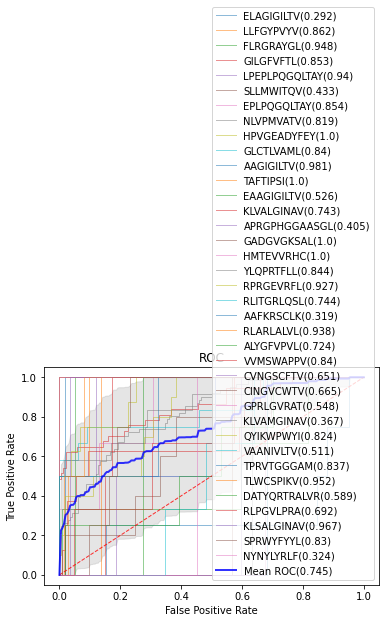

/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/met

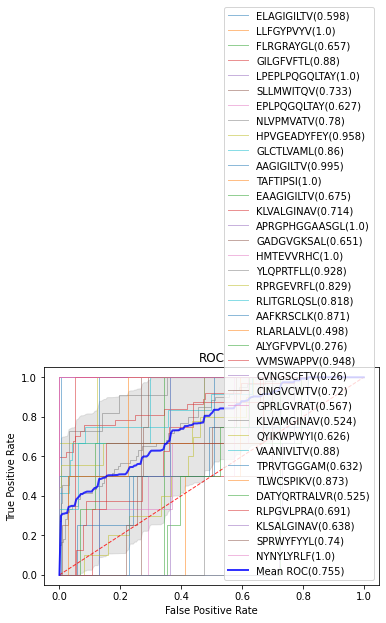

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
X, y, feature_names, kmer_count_dict, epitope_names = create_features_matrix(filtered_df, include_alpha=False, include_beta=True, alpha_col='cdr3.alpha', beta_col='cdr3.beta', label_col='antigen.epitope', k=3)
classifier = GradientBoostingClassifier(subsample=0.8,random_state=10, n_estimators=200, learning_rate=0.01, max_features='sqrt', max_depth=7)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
auc_result, acc, precision, recall = predict_auc(X, y, classifier, 5, epitope_names, True)


In [117]:
print(auc_result)

{1: {0: 0.6492753623188405, 1: 1.0, 2: 0.995260663507109, 3: 0.888957528957529, 4: 0.9999999999999999, 5: 0.8720379146919431, 6: 1.0, 7: 0.8171052631578947, 8: 1.0, 9: 0.9192114418245071, 10: 1.0, 11: 0.8261562998405104, 12: 0.7480063795853269, 13: 0.7640931372549019, 14: 0.34123222748815163, 15: 0.35545023696682465, 16: 1.0, 17: 0.9497964721845319, 18: 0.9928845101258894, 19: 0.8523809523809524, 20: 0.7630331753554502, 21: 0.886255924170616, 22: 0.7095238095238096, 23: 0.7203791469194313, 24: 0.7192982456140351, 25: 0.8040865384615384, 26: 0.8547619047619048, 27: 0.6398104265402843, 28: 0.692079207920792, 29: 0.6810207336523125, 30: 0.7119047619047619, 31: 0.6142857142857143, 32: 0.6995192307692308, 33: 0.9071428571428571, 34: 0.4691943127962085, 35: 0.6937198067632849, 36: 0.95260663507109, 'micro': 0.9040089395197975, 'macro': 0.7986200763685909}, 2: {0: 0.5603864734299516, 1: 1.0, 2: 1.0, 3: 0.9034749034749034, 4: 1.0, 5: 0.7393364928909952, 6: 0.9330143540669856, 7: 0.845394736842

In [118]:
import numpy as np

# Initialize a dictionary to store the sum of AUCs for each epitope across all folds
epitope_auc_totals = {i: 0 for i in range(37)}  # Adjust range if you have more or fewer epitopes
fold_count = len(auc_result)  # Number of folds

# Sum up the AUCs for each epitope from each fold
for fold in auc_result.values():
    for epitope in range(37):  # Adjust range similarly
        epitope_auc_totals[epitope] += fold[epitope]

# Calculate the average AUC for each epitope
epitope_auc_averages = {epitope: total / fold_count for epitope, total in epitope_auc_totals.items()}


In [1]:
%whos

Interactive namespace is empty.


# Attempting clustering

In [10]:
X, y, feature_names, kmer_count_dict, epitope_names = create_features_matrix(filtered_df, include_alpha=False, include_beta=True, alpha_col='cdr3.alpha', beta_col='cdr3.beta', label_col='antigen.epitope', k=3)

In [22]:
# Print the number of features (columns) in the dataset
print("The dataset has {} dimensions (features).".format(X.shape[1]))


The dataset has 2069 dimensions (features).


# PCA and KMeans

In [38]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)  # retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)
print("PCA reduced the dataset to {} dimensions.".format(pca.n_components_))

k = 5 # Example number of clusters
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(X_pca)  # Change to X_scaled if not using PCA


score = silhouette_score(X_pca, clusters)  # Change to X_scaled if not using PCA
print("Silhouette Score: ", score)
import matplotlib.pyplot as plt




PCA reduced the dataset to 2 dimensions.
Silhouette Score:  0.7131914573103816


/Users/joesouber/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


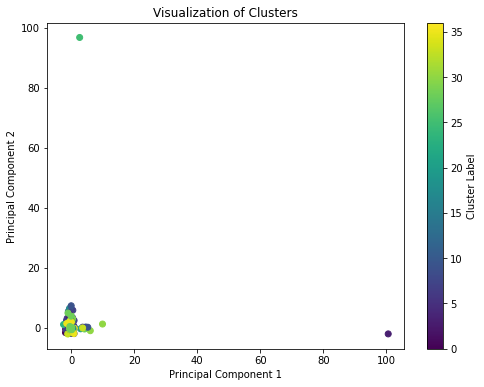

In [44]:
# This is for 2D visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', marker='o')
plt.title('Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

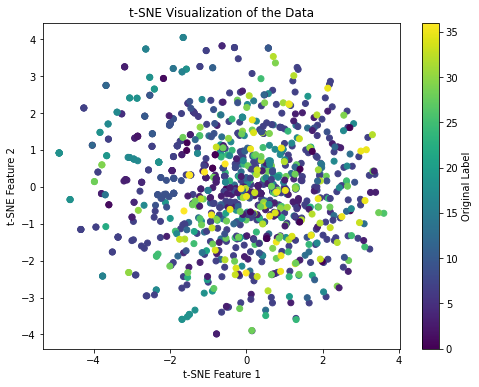

In [43]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=100, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', marker='o')
plt.title('t-SNE Visualization of the Data')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(scatter, label='Original Label')
plt.show()
